# Importing the libraries

In [24]:
import pandas as pd
import numpy as np
import seaborn as sn
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt

# Loading the dataset

In [4]:
delivery = pd.read_csv("delivery_time.csv")

In [86]:
delivery.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


We can just peek into few data points by using head function of pandas. By default, head function return top 5 values 

# Data insights

In [12]:
delivery.shape

(21, 2)

The dataset comprises of 21 observations and 2 features/variables.
So, we have one variable which is independent and one is dependent.

We need to predict the Delivery time value based on the Sorting time here. So, Delivery time is dependent variable (target) and Sorting time is independent variable in our case.

In [17]:
delivery.columns

Index(['Delivery Time', 'Sorting Time'], dtype='object')

We can see the label of the columns (columns names)

In [18]:
delivery.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
Delivery Time    21 non-null float64
Sorting Time     21 non-null int64
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


We can see that Delivery time variable is having floating point data type values and Sorting time has int data type values. 
We can also see that all 21 observations are non null and hence we don't have any missing values

In [87]:
delivery[delivery.duplicated()]

,Delivery Time,Sorting Time


We don't have any duplicate values in our dataset. If duplicates values would have been present we would have to delete it.

# Summary statistics

In [19]:
delivery.describe()

,Delivery Time,Sorting Time
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


### Observations :- 

1. The mean value and the median value (50% or percentile) are not having much difference between them. 
2. Also there is not a big difference in the 75% value and max value for both the features
3. From observations, 1 and 2 we can say that there is no outlier in the dataset.

# Understanding target variables

Our target variable is Delivery time and we need to predict the Delivery time based on the Sorting time 

In [23]:
delivery['Delivery Time'].unique()

array([21.  , 13.5 , 19.75, 24.  , 29.  , 15.35, 19.  ,  9.5 , 17.9 ,
       18.75, 19.83, 10.75, 16.68, 11.5 , 12.03, 14.88, 13.75, 18.11,
        8.  , 17.83, 21.5 ])

### Observations :-


The Delivery time variable here is a continuous variable and is numerical data

In [24]:
delivery['Delivery Time'].value_counts()

16.68    1
19.83    1
13.50    1
19.75    1
24.00    1
29.00    1
19.00    1
9.50     1
18.75    1
10.75    1
15.35    1
14.88    1
11.50    1
13.75    1
8.00     1
12.03    1
21.50    1
18.11    1
17.90    1
17.83    1
21.00    1
Name: Delivery Time, dtype: int64

### Observations :-

We could see that al the observations have only 1 count which means they are unique. There are no duplicates in our data 

# Data visualization

Performing univariate analysis using boxplot. Boxplots are very intuitive for checking any outlier data 

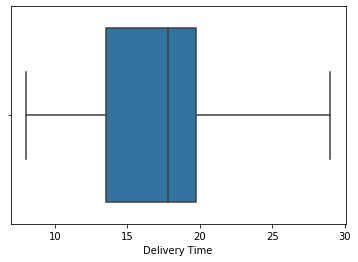

In [27]:
sn.boxplot(delivery['Delivery Time'])

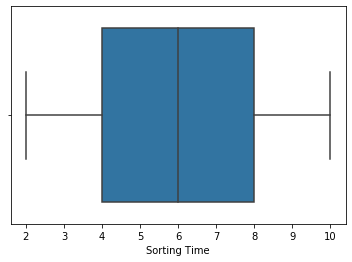

In [28]:
sn.boxplot(delivery['Sorting Time'])

### Observations :- 

1. There are no outliers in both Delivery time and Sorting time variables. So, we are good to proceed with our model prediction part. The outliers usually reduces the accuracy the model and might give incorrect predictions results.
2. By observing the box plot of Delivery Time we can also see that the median line of the plot is slight towards the lower portion of the box. We can say that the data points are negatively skewed. 

We will plot a density plot which also helps the see the distribution of the data and give insight regarding skewness.

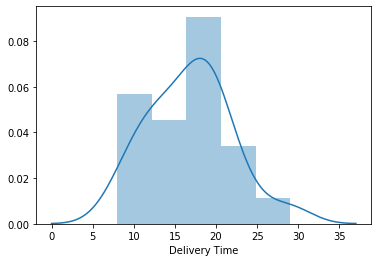

In [7]:
sn.distplot(delivery['Delivery Time'])

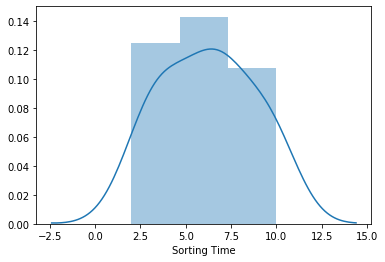

In [8]:
sn.distplot(delivery['Sorting Time'])

### Observations :- 

1. In the density plot of Delivery time, we can observe a slight negative skewness
2. The density plot of Sorting time is a bell shaped curve and looks like it is normal distribution

### Pair Plots

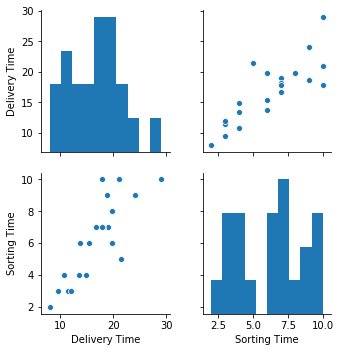

In [88]:
sn.pairplot(delivery)

### Observations :- 

1. There is a positive correlation between the Delivery time and the Sorting time. We can see Delivery time increases as sorting time increases and vice versa

## Heatmap

Heatmap is a very effective technique to check the missing values in the dataset and to also understand if there is any correlation between the features of the data

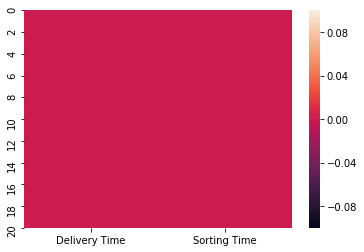

In [15]:
sn.heatmap(delivery.isnull())

### Observations :-

1. We don't have any missing values in our dataset. If it was present, there would be a different colour shade appearing on the red background. 

We can check missing values by using isna() method as well.

In [33]:
delivery.isna().sum()

Delivery Time    0
Sorting Time     0
dtype: int64

# Correlation

The Correlation matrix is an important data analysis metric that is computed to summarize data to understand the relationship (correlation) between various variables and make decisions accordingly.

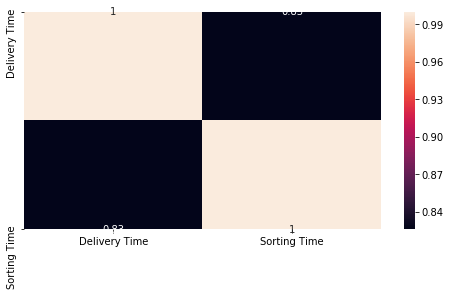

In [29]:
plt.figure(figsize=(8,4))
sn.heatmap(delivery.corr(),annot = True)

### Observations :-

1. The correlation value between Delivery time and Sorting Time is 0.83 which is not very much high. It is a positive correlation.

# Finding correlation

In [31]:
delivery.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


We can find the correlation values directly by corr() method. The value is 0.83 and we can say Delivery Time and Sorting Time are having less correlation.


# Fitting a linear regression model

We need to predict the Delivery time based on the Sorting time. We have one dependent variable Delivery time and and one independent Sorting Time. So we can use linear regression algorithm to predict and fit the line. 

In [70]:
delivery_new = delivery.rename(columns={'Delivery Time':'DT'})

In [71]:
delivery_new1 = delivery_new.rename(columns={'Sorting Time':'ST'})

In [72]:
delivery_new1

,DT,ST
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [76]:
model = smf.ols('DT~ST',delivery_new1).fit()

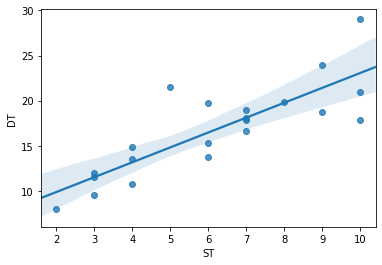

In [77]:
sn.regplot(x="ST", y="DT",data=delivery_new1);

### Coeffecients of model

In [78]:
model.params

Intercept    6.582734
ST           1.649020
dtype: float64

### t and p values 

In [79]:
print(model.tvalues, '\n', model.pvalues) 

Intercept    3.823349
ST           6.387447
dtype: float64 
 Intercept    0.001147
ST           0.000004
dtype: float64


### R squared values


In [80]:
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

### Predict the Delivery time for new Sorting time values

In [81]:
newdata = pd.Series([12,14,16])

Creating a new series for Sorting time with values 12,14 and 16. We will using these data points and predict the Delivery time.

In [83]:
ST_newdata = pd.DataFrame(newdata,columns=['ST'])

In [84]:
ST_newdata

,ST
0,12
1,14
2,16


In [85]:
model.predict(ST_newdata)

0    26.370973
1    29.669013
2    32.967052
dtype: float64

For Sorting time values of 12,14 and 16 we get the Delivery time predicted values as 26.37, 29.67 and 32.97 respectively.